c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warni

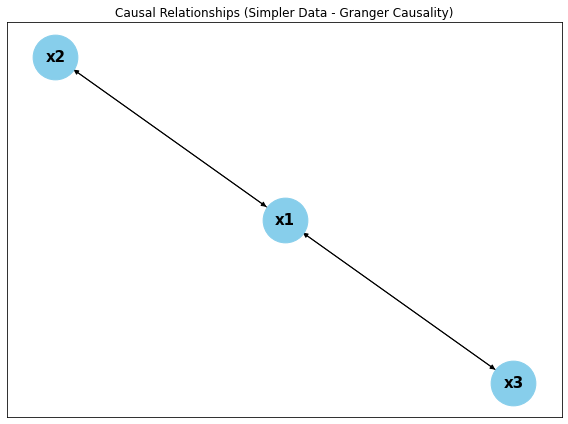

In [20]:
import numpy as np #SIMPLE DATA
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import networkx as nx

# Create simpler time series data
N = 100
t = np.linspace(1, N, N)
x1 = np.sin(t) + np.random.normal(0, 0.5, N)
x2 = np.roll(x1, 1) * 0.9 + np.random.normal(0, 0.5, N)
x3 = x2 + np.random.normal(0, 0.5, N) - 0.5

data_simple = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3})

# Granger causality tests
max_lag = 2
alpha_significance = 0.05
granger_test_results = {}

for var in data_simple.columns:
    granger_test_results[var] = {}
    for causing_var in data_simple.columns:
        if var != causing_var:
            test_result = grangercausalitytests(data_simple[[var, causing_var]], max_lag, verbose=False)
            min_p_value = min(test_result[lag][0]['ssr_chi2test'][1] for lag in range(1, max_lag + 1))
            granger_test_results[var][causing_var] = min_p_value

# Convert results to DataFrame and identify significant relationships
p_values_df = pd.DataFrame(granger_test_results)
significant_relationships = (p_values_df < alpha_significance).astype(int)

# Plot the causal graph
G = nx.from_pandas_adjacency(significant_relationships, create_using=nx.DiGraph)

plt.figure(figsize=(8, 6))
nx.draw_networkx(G, with_labels=True, node_size=2000, node_color='skyblue', font_size=15, font_weight='bold')
plt.title('Causal Relationships (Simpler Data - Granger Causality)')
plt.show()


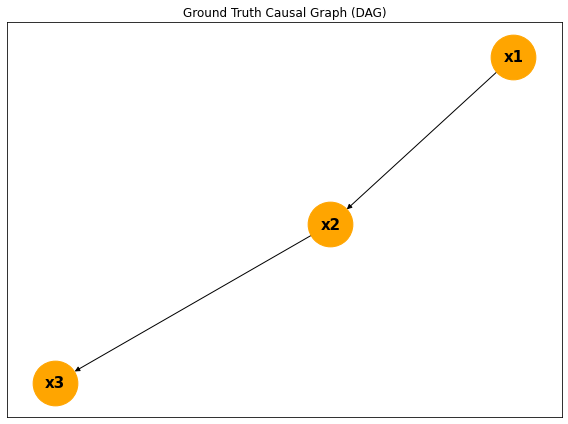

In [15]:
# Define the ground truth for the causal graph based on the simpler time series data description
ground_truth_edges = [('x1', 'x2'), ('x2', 'x3')]

# Create a Directed Acyclic Graph (DAG) for the ground truth
G_ground_truth = nx.DiGraph()
G_ground_truth.add_edges_from(ground_truth_edges)

plt.figure(figsize=(8, 6))
nx.draw_networkx(G_ground_truth, with_labels=True, node_size=2000, node_color='orange', font_size=15, font_weight='bold')
plt.title('Ground Truth Causal Graph (DAG)')
plt.show()


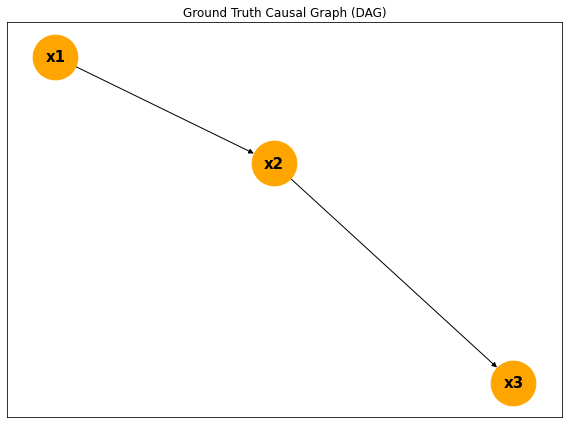

c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warni

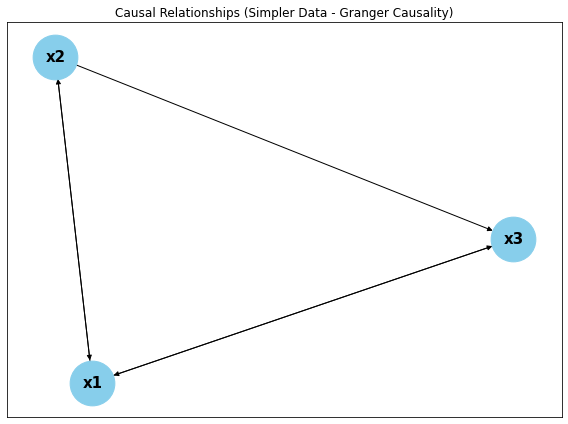

(None,
     x1  x2  x3
 x2   1   0   1
 x3   1   0   0
 x1   0   1   1)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import networkx as nx

# Create simpler time series data
N = 100
t = np.linspace(1, N, N)
x1 = np.sin(t) + np.random.normal(0, 0.5, N)
x2 = np.roll(x1, 1) * 0.9 + np.random.normal(0, 0.5, N)
x3 = x2 + np.random.normal(0, 0.5, N) - 0.5

data_simple = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3})

# Define the ground truth for the causal graph based on the simpler time series data description
ground_truth_edges = [('x1', 'x2'), ('x2', 'x3')]

# Create a Directed Acyclic Graph (DAG) for the ground truth
G_ground_truth = nx.DiGraph()
G_ground_truth.add_edges_from(ground_truth_edges)

plt.figure(figsize=(8, 6))
nx.draw_networkx(G_ground_truth, with_labels=True, node_size=2000, node_color='orange', font_size=15, font_weight='bold')
plt.title('Ground Truth Causal Graph (DAG)')
plt.show()


# Granger causality tests
max_lag = 2
alpha_significance = 0.05
granger_test_results = {}

for var in data_simple.columns:
    granger_test_results[var] = {}
    for causing_var in data_simple.columns:
        if var != causing_var:
            test_result = grangercausalitytests(data_simple[[var, causing_var]], max_lag, verbose=False)
            min_p_value = min(test_result[lag][0]['ssr_chi2test'][1] for lag in range(1, max_lag + 1))
            granger_test_results[var][causing_var] = min_p_value

# Convert results to DataFrame and identify significant relationships
p_values_df = pd.DataFrame(granger_test_results)
significant_relationships = (p_values_df < alpha_significance).astype(int)

# Plot the causal graph
G = nx.from_pandas_adjacency(significant_relationships, create_using=nx.DiGraph)

plt.figure(figsize=(8, 6))

nx.draw_networkx(G, with_labels=True, node_size=2000, node_color='skyblue', font_size=15, font_weight='bold')
plt.title('Causal Relationships (Simpler Data - Granger Causality)')
plt.show(), significant_relationships


In [17]:
c_indx

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

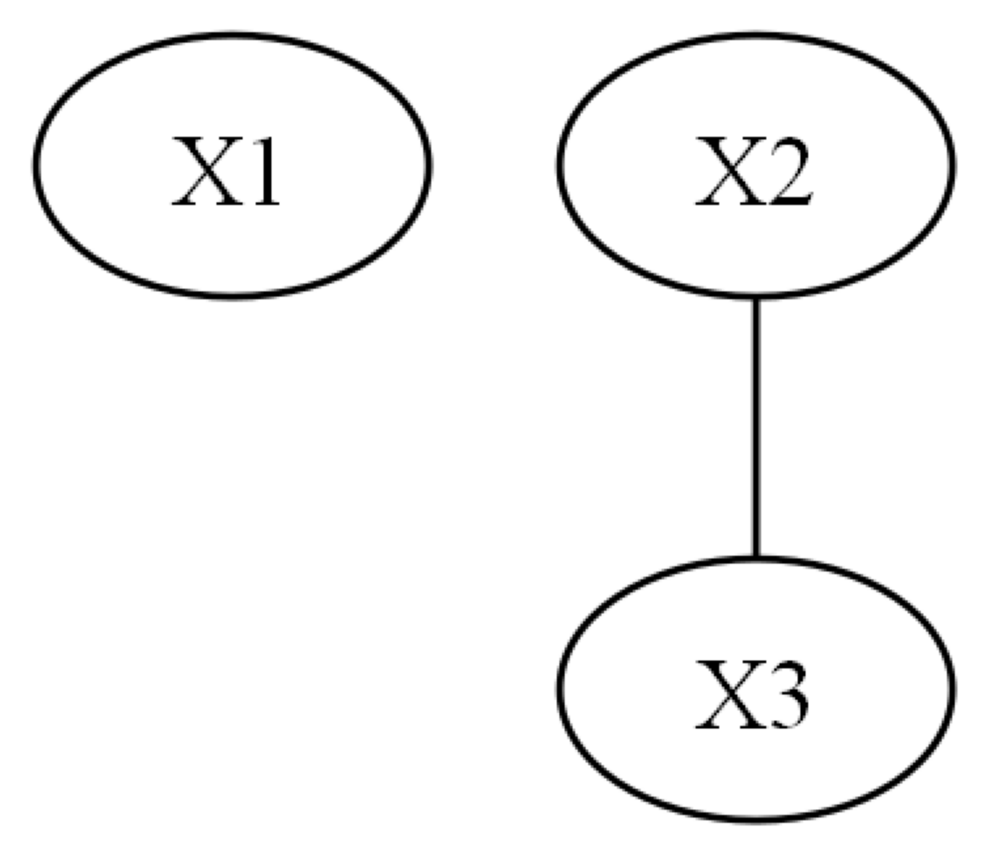

In [21]:
import numpy as np
import pandas as pd
from causallearn.search.ScoreBased.GES import ges
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

# Assuming 'data_array' is your data loaded as a numpy array
# data_array = np.array([...])  # Make sure this is defined
data_array = data_simple.values
# Running GES with default parameters
Record = ges(data_array)

# Visualization of the learned causal graph
pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

# Saving the graph to a PNG file
pyd.write_png('ges_causal_graph.png')


  0%|          | 0/3 [00:00<?, ?it/s]

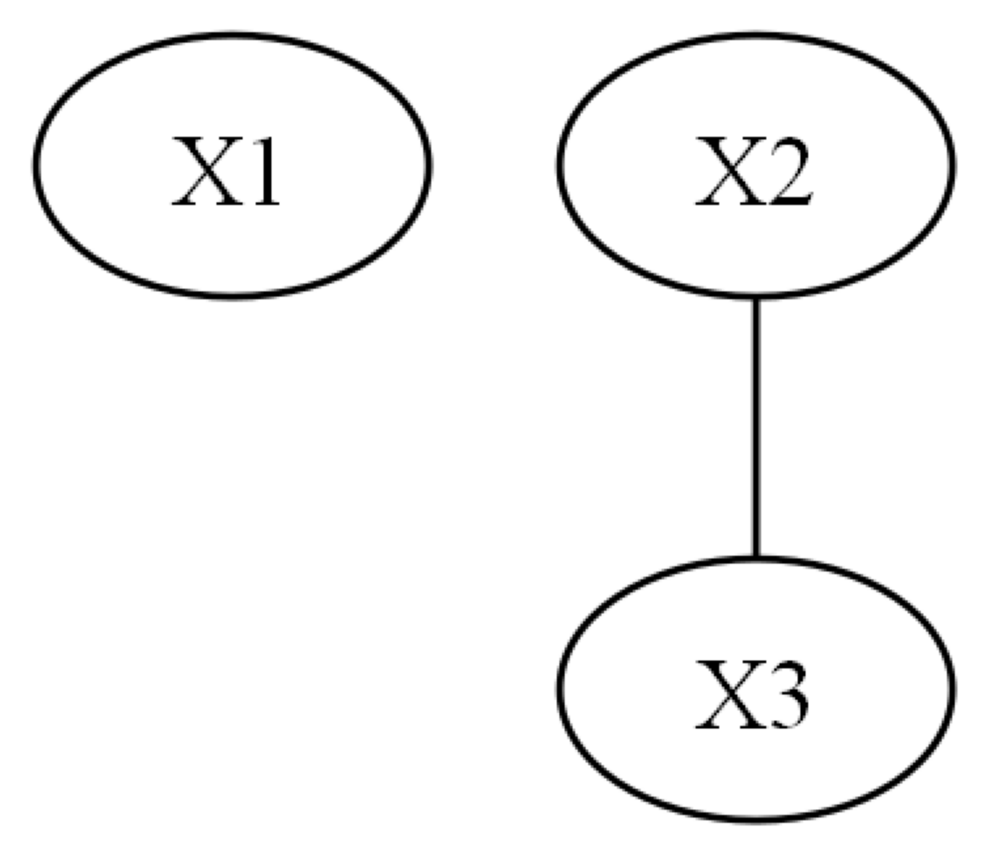

In [22]:
from causallearn.search.ConstraintBased.PC import pc


data = data_simple

# default parameters
cg = pc(data.values)

# or customized parameters
#cg = pc(data, alpha, indep_test, stable, uc_rule, uc_priority, mvpc, correction_name, background_knowledge, verbose, show_progress)

# visualization using pydot
cg.draw_pydot_graph()

# or save the graph
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('simple_test.png')

# # visualization using networkx
# cg.to_nx_graph()
# cg.draw_nx_graph(skel=False)

  0%|          | 0/4 [00:00<?, ?it/s]

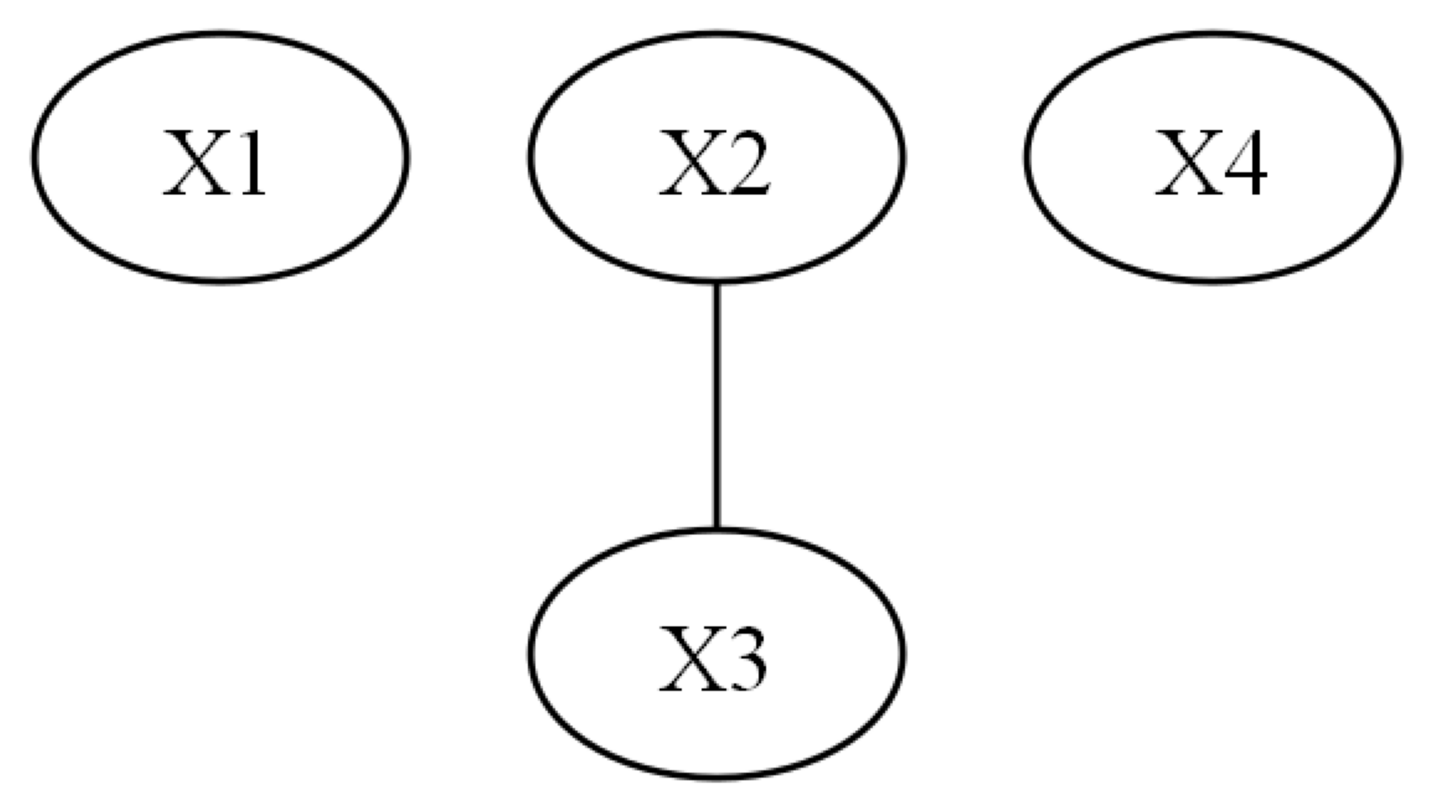

In [13]:
import numpy as np
import pandas as pd
from causallearn.search.ConstraintBased.CDNOD import cdnod
from causallearn.utils.GraphUtils import GraphUtils
import pydot
import os

graphviz_path = r'C:\Program Files\Graphviz\bin'
os.environ["PATH"] += os.pathsep + graphviz_path

# Assuming you have the time series data from previous code in the variables x1, x2, x3, x4
# Now create a DataFrame from your time series data
data = data_simple

# # Create the 'c_indx' array. If it represents a time index, it could just be the time steps:
# c_indx = np.arange(1, N+1)  # Assuming N is the length of your time series

# # Now add c_indx as a new column to your DataFrame
# data['c_indx'] = c_indx
c_indx = np.arange(1, N+1).reshape(-1, 1)

# Make sure you pass the entire DataFrame to cdnod
# Specify the index of the c_indx column, which is the last column in the DataFrame
#cg = cdnod(data, c_indx )
cg = cdnod(data, c_indx, alpha=0.05, indep_test='fisherz', stable=True, uc_rule=0, uc_priority=2, mvcdnod=False,
           correction_name='MV_Crtn_Fisher_Z', background_knowledge=None, verbose=False, show_progress=True)


# Visualize using pydot
cg.draw_pydot_graph()

# Save the graph to a PNG file
pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('cdnod_causal_graph.png')
